In [1]:
from tinygrad import Tensor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names = open("./names.txt").read().splitlines()

In [3]:
SPECIAL_TOKEN = "."
vocab = [SPECIAL_TOKEN] + [chr(unicode) for unicode in range(ord("a"), ord("a") + 26)]
vocab_size = len(vocab)

In [4]:
def create_transition_matrix(names):
    N = np.zeros((vocab_size, vocab_size), dtype=int)

    for name in names:
        name_chars = [SPECIAL_TOKEN] + list(name) + [SPECIAL_TOKEN]
        for char_a, char_b in zip(name_chars, name_chars[1:]):
            N[vocab.index(char_a), vocab.index(char_b)] += 1

    return Tensor(N)

In [5]:
N = create_transition_matrix(names)

In [6]:
def draw_transition_matrix(N: Tensor):
    plt.figure(figsize=(16, 16))
    plt.imshow(N.numpy(), cmap="Blues")
    for i in range(vocab_size):
        for j in range(vocab_size):
            text = vocab[i] + vocab[j]
            plt.text(j, i, text, ha="center", va="bottom", color="gray")
            plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

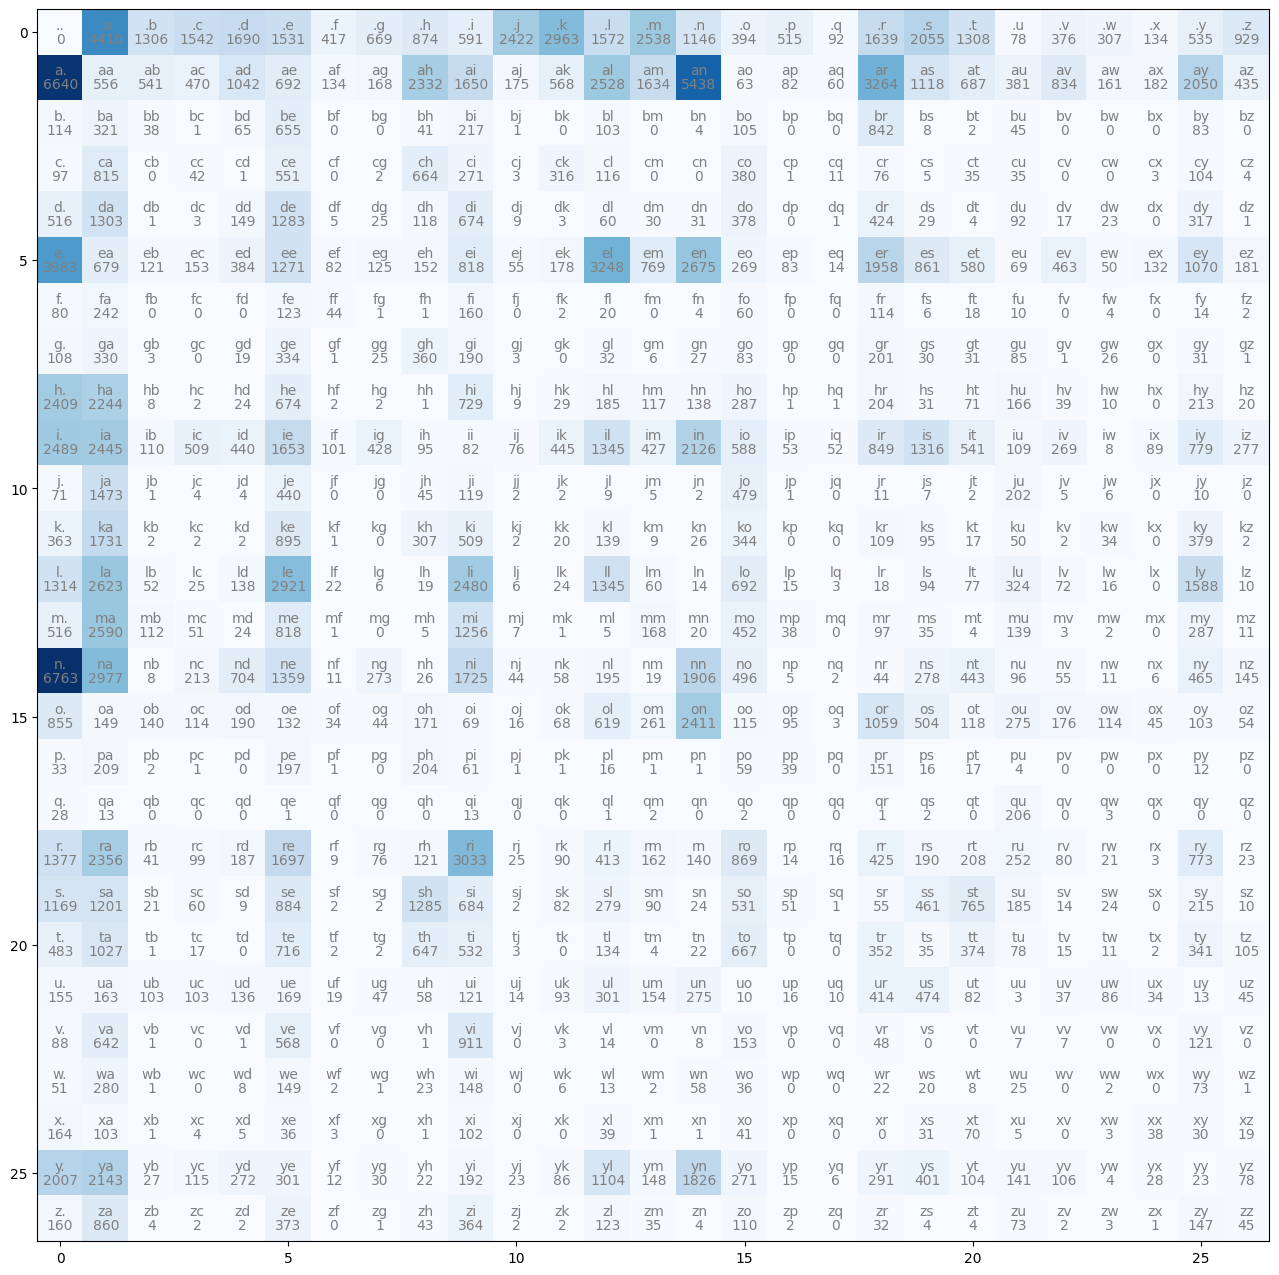

In [7]:
draw_transition_matrix(N)

In [15]:
P = N / N.sum(axis=1, keepdim=True)


def generate_word(starting_chars="", max_length=float("inf")):
    word = SPECIAL_TOKEN + starting_chars
    while len(word[1:]) < max_length:
        current_char = np.random.choice(a=vocab, p=P[vocab.index(word[-1])].numpy())
        if current_char == SPECIAL_TOKEN:
            return word[1:]
        word += current_char

In [16]:
generated_names = []
for _ in range(32000):
    generated_names.append(generate_word())

generated_names[:100]

['grarana',
 'ielen',
 'ann',
 'heroron',
 'kl',
 'aphasannudus',
 'ckarydeleakhie',
 'zyrane',
 'ka',
 'maniynlave',
 'ja',
 'lor',
 'rmiss',
 'm',
 'temei',
 'jale',
 'ja',
 'cokhe',
 'arasomar',
 'gho',
 'jusvamiswhario',
 'al',
 'lailetordacin',
 'hvavianydeidiq',
 'dilukia',
 'ga',
 'elirennn',
 'milon',
 'gailaza',
 'ziiothie',
 'hz',
 'ku',
 'r',
 'llyudan',
 'kal',
 'ostah',
 'a',
 'lixi',
 'dieeriekaraninnynnan',
 'bahazi',
 'sselemia',
 'n',
 'briemiara',
 'preslore',
 'ran',
 'phe',
 'y',
 'eport',
 'kikioravawen',
 'abixxitayssisstellakenanseinturtana',
 'jorkyme',
 'ziny',
 'efonios',
 'kyn',
 'henoli',
 'llishrieslieridein',
 'ran',
 'ay',
 'isuashahee',
 'anakanonnaneleenatty',
 'dann',
 'fian',
 'jalli',
 'khi',
 'mbraileizeyd',
 'clanikon',
 'kaorymbe',
 'a',
 'co',
 'wae',
 'a',
 'isiytrevola',
 'leleameikunas',
 'jedhigahvigamahe',
 'mi',
 'tipadureysush',
 'bel',
 'mitijallosaneve',
 'vili',
 'jiahyulenan',
 'lewiex',
 'nsan',
 'juie',
 'raiona',
 'n',
 'aryn',
 'ce

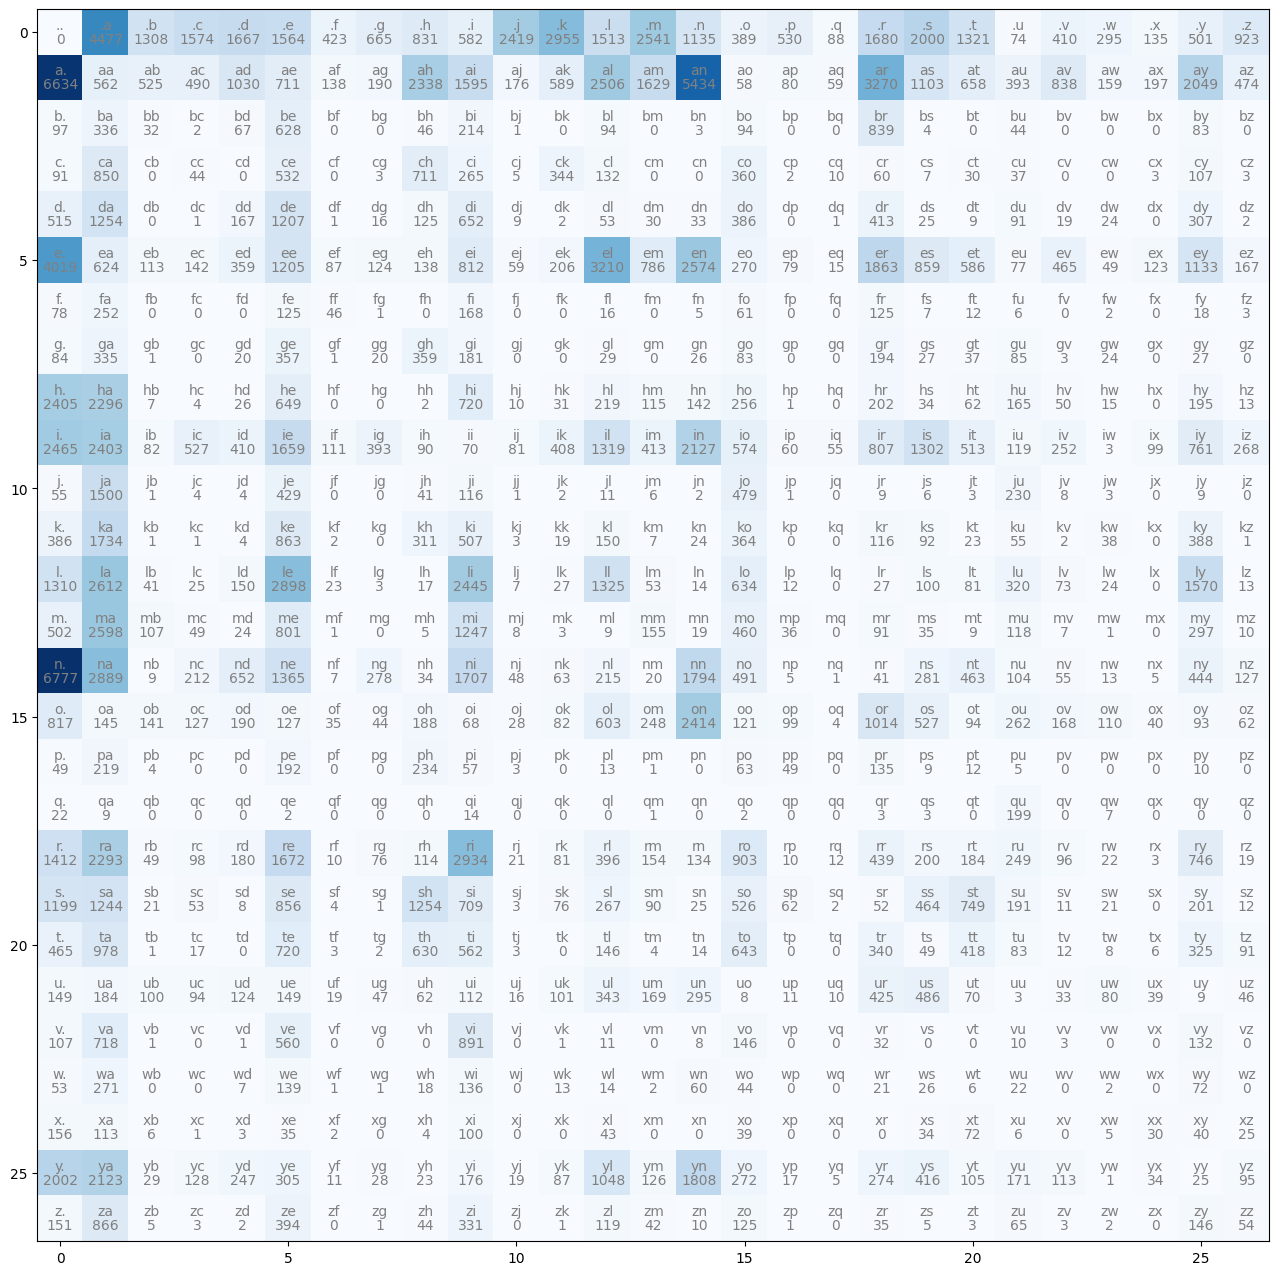

In [17]:
draw_transition_matrix(create_transition_matrix(generated_names))